# El dataset de MNIST

In [ ]:
# cargamos un dataset que incluye tf. ya viene preparado en imágenes de 28x28

In [6]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [10]:
len(train_images)

60000

In [11]:
len(test_images)

10000

In [ ]:
# visualizamos imágenes

In [14]:
im_temp = train_images[0]
im_temp

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
from skimage import io
import numpy as np

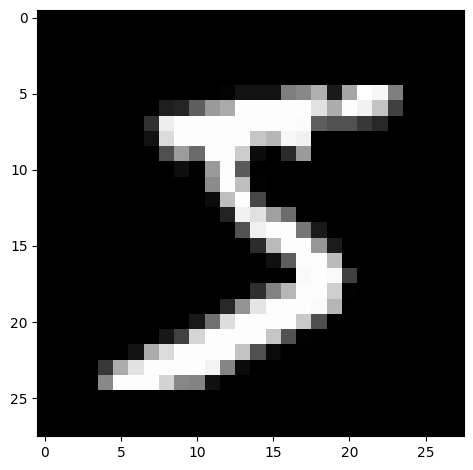

In [16]:
io.imshow(np.reshape(im_temp, (28,28)))

In [ ]:
# esto parece un número 5, lo vamos a comprobar:

In [17]:
train_labels[0]

5

# Una red neuronal con Tensor Flow - v1
* Las imágenes de entrenamiento de MNIST viven en un espacio vectorial de dimensión 784.
* El dataset se puede pensar como 60000 filas y 784 columnas (28x28).
* Cada dato del datset es un número real entre 0 y 1.

y = softmax(W * x + b)

In [18]:
# 784= 28 x 28 y 10 categorías son los números del 0 al 9
dim_input = 784
n_categories = 10

In [20]:
tf.compat.v1.disable_eager_execution()
x = tf.compat.v1.placeholder(tf.float32, [None, dim_input])    #none es que no hemos definido ninguna dimension en concreto, lo que entrara por aquí podria tener cualquier longitud

In [21]:
W = tf.Variable(tf.zeros([dim_input,n_categories])) 
b = tf.Variable(tf.zeros([n_categories]))

In [22]:
softmax_args = tf.matmul(x,W) + b   # softmax_args = lo que está dentro del paréntesis en la fórmula de arriba (ojo, nota que el W·x se escribe al revés aquí)
y_hat = tf.nn.softmax(softmax_args)   # y_hat = predicción

#### Entrenando la red neuronal
* Loss / Cost <- objetivo minimizar las pérdidas

In [23]:
from IPython.display import display, Math, Latex

In [24]:
display(Math(r"H_{y}(\hat{y}) = -\sum_{i} y_i log(\hat{y_i})"))

<IPython.core.display.Math object>

In [ ]:
# para entrenar un modelo de red neuronal, hay que definir qué es un modelo bueno, aunque en realidad definimos qué es un modelo malo. 
# esto es lo que definimos como coste o loss. esto es cómo de lejos está nuestro modelo de la salida que queremos que tenga. se trata de minimizar el coste.

In [25]:
y_ = tf.compat.v1.placeholder(tf.float32, [None, 10])

In [ ]:
# aplico la fórmula de la entropia de arriba:

In [28]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.math.log(y_hat), axis= 0))

In [29]:
# esto justo de arriba lo hace igual esto:

tf.nn.softmax_cross_entropy_with_logits(softmax_args, y_)

<tf.Tensor 'softmax_cross_entropy_with_logits/Reshape_2:0' shape=(None,) dtype=float32>

In [32]:
##### deshabilito tensorflow 2.0

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [33]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [34]:
session = tf.InteractiveSession()

In [35]:
tf.global_variables_initializer().run()

In [40]:
for _ in range(10000):
    batch_x, batch_y = train_images.next_batch(150)   #cogemos 150ptos al azar
    session.run(train_step, feed_dict={x:batch_x, y_: batch_y})

AttributeError: ignored